# Bias Mitigation Analysis - All

In [1]:
data_name = 'All'

In [2]:
from analysis_utils import *
%matplotlib inline

In [3]:
# import os
import pandas as pd
dir_path = './Result_Diff_Degree/'
all_table_list = {}
for metric in ['Accuracy','Fairness']:
    for category in ['metrics','base','bm']:
        key = ('_').join([metric, category])
        all_table_list[key] = {}
        print('-'*30)
        print(key)
        print('-'*30)
        for dataset in ['Adult','Compas','German_Credit']:
            file = (('_').join([dataset, metric, category]))
            print(dataset)
            table = pd.read_pickle(dir_path+file)
            all_table_list[('_').join([metric, category])][dataset] = table
        # add the tables together accordingly
        all_table_list[key]['All'] = all_table_list[key]['Adult']+\
                                     all_table_list[key]['Compas']+\
                                     all_table_list[key]['German_Credit']

------------------------------
Accuracy_metrics
------------------------------
Adult
Compas
German_Credit
------------------------------
Accuracy_base
------------------------------
Adult
Compas
German_Credit
------------------------------
Accuracy_bm
------------------------------
Adult
Compas
German_Credit
------------------------------
Fairness_metrics
------------------------------
Adult
Compas
German_Credit
------------------------------
Fairness_base
------------------------------
Adult
Compas
German_Credit
------------------------------
Fairness_bm
------------------------------
Adult
Compas
German_Credit


In [4]:
# show one "All" table
all_table_list['Accuracy_metrics']['All']

,avg_acc_score,avg_bacc_score,avg_f1_score,avg_auc_score,avg_mcc_score,avg_norm_mcc_score
noorincrease,113,105,121,55,89,89
small,0,2,0,12,7,7
medium,5,6,11,5,9,9
large,38,43,24,84,51,51


In [5]:
import seaborn as sns
accuracy_metrics = ['acc_score', 'bacc_score', 'f1_score', 'auc_score', 'mcc_score','norm_mcc_score']
group_fairness = ['spd_score', 'aod_score', 'eod_score','ford_score','ppvd_score']
individual_fairness = ['(1-consistency_score)','gei_score','ti_score']
fairness_metrics = group_fairness+individual_fairness
avg_accuracy_metrics = ['avg_'+col for col in accuracy_metrics]
avg_fairness_metrics = ['avg_'+col for col in fairness_metrics]

In [6]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]

## Analysis like in Chen et al. (2023)

### Accuracy Behavior After Bias Mitigations

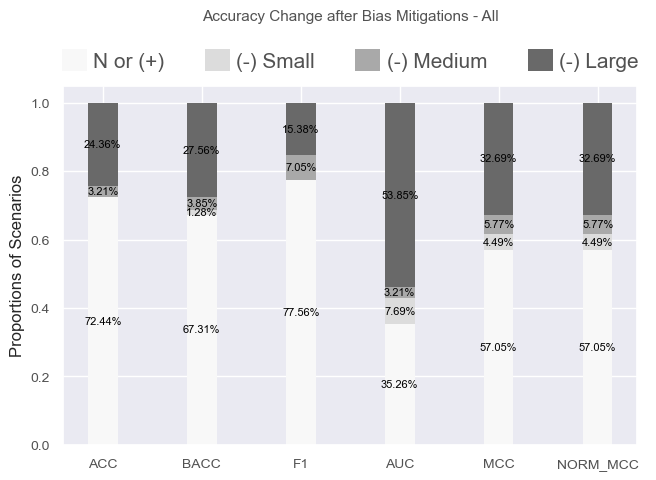

In [6]:
diff_degree = all_table_list['Accuracy_metrics']['All']
plot_behaviour_analysis(diff_degree, data_name, caption='Accuracy Change after Bias Mitigations - {}', figsize=(8, 6))

### Accuracy Behavior After Bias Mitigations per BM

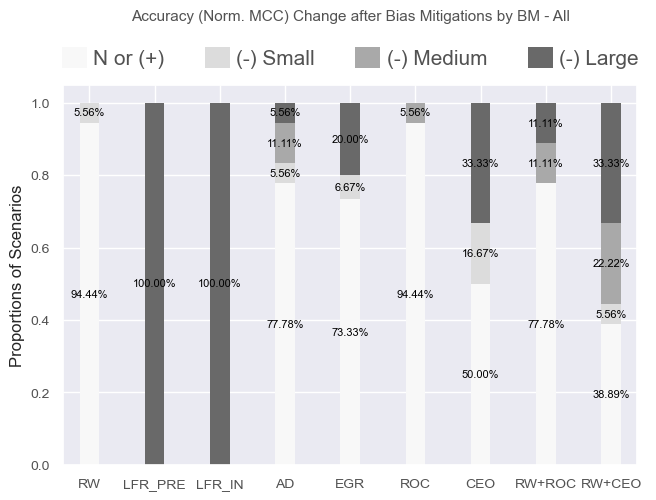

In [7]:
diff_degree = all_table_list['Accuracy_bm']['All']
plot_behaviour_analysis(diff_degree, data_name, category='bm', 
                        caption='Accuracy (Norm. MCC) Change after Bias Mitigations by BM - {}', figsize=(8, 6))

### Accuracy Behavior After Bias Mitigations per base

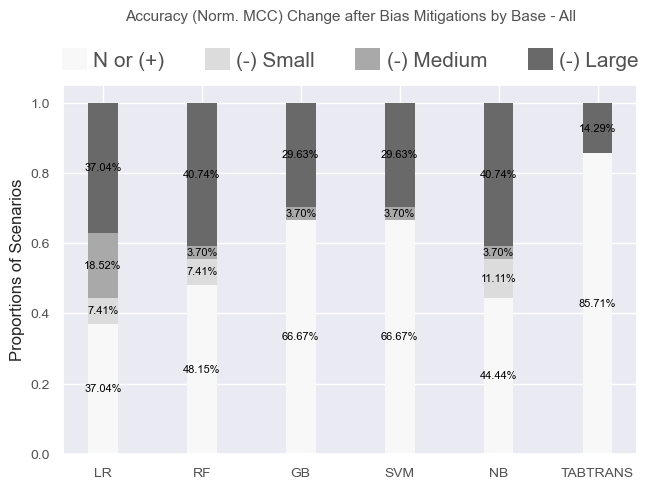

In [8]:
diff_degree = all_table_list['Accuracy_base']['All']
plot_behaviour_analysis(diff_degree, data_name, category='base', 
                        caption='Accuracy (Norm. MCC) Change after Bias Mitigations by Base - {}', figsize=(8, 6))

### Fairness Behavior After Bias Mitigations

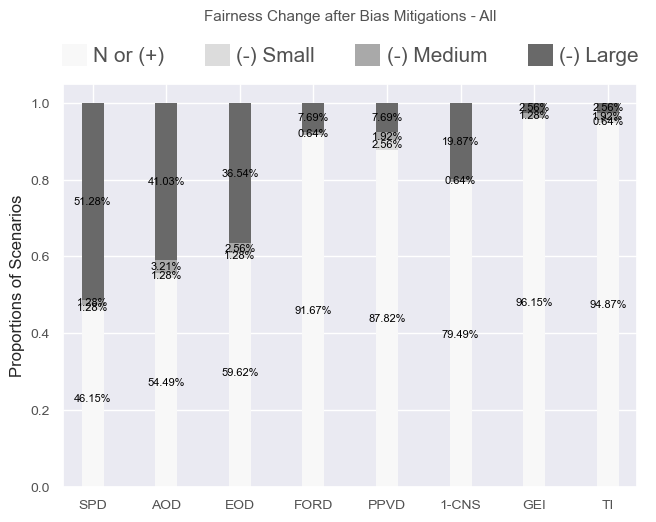

In [9]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = all_table_list['Fairness_metrics']['All']
plot_behaviour_analysis(diff_degree, data_name, caption='Fairness Change after Bias Mitigations - {}', figsize=(8, 6))

### Fairness Behavior After Bias Mitigations per BM

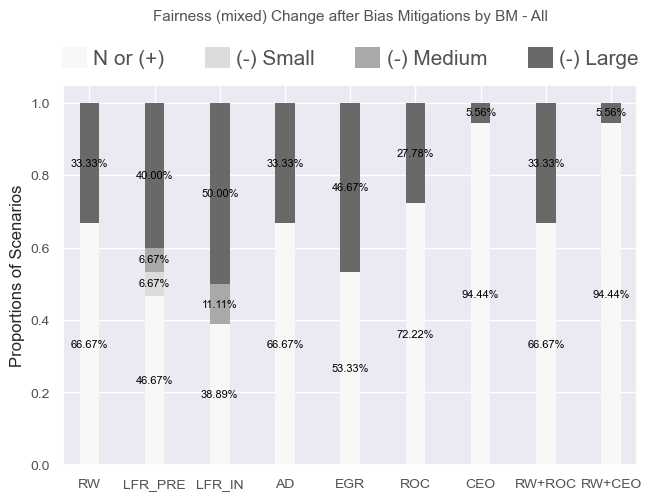

In [10]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = all_table_list['Fairness_bm']['All']
plot_behaviour_analysis(diff_degree, data_name, category='bm', 
                        caption='Fairness (mixed) Change after Bias Mitigations by BM - {}',
                        figsize=(8, 6))

### Fairness Behavior After Bias Mitigations per base

In [11]:
all_table_list.keys()

dict_keys(['Accuracy_metrics', 'Accuracy_base', 'Accuracy_bm', 'Fairness_metrics', 'Fairness_base', 'Fairness_bm'])

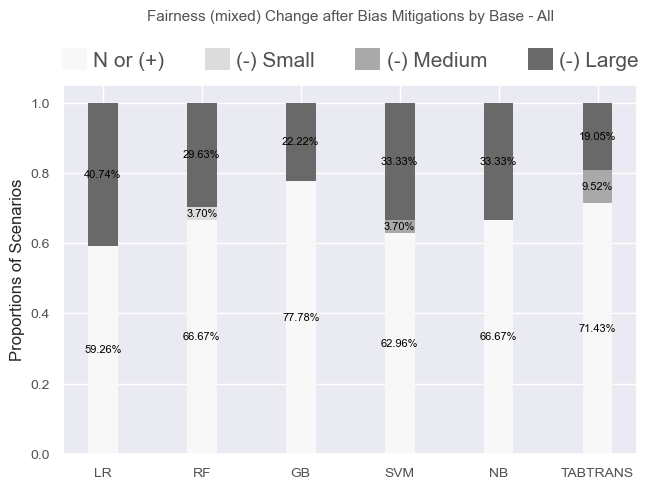

In [12]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = all_table_list['Fairness_base']['All']
plot_behaviour_analysis(diff_degree, data_name, category='base', 
                        caption='Fairness (mixed) Change after Bias Mitigations by Base - {}',
                        figsize=(8, 6))